# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data 준비

## Data Load

In [1]:

# 데이터 불러오기
data = pd.read_csv("../data/comment_translation_predict_label.csv")  # 중복 제거된 데이터 (ex: df.iloc[1200:, :])
train_df = pd.read_csv("../data/train.csv")  # 원본 데이터



NameError: name 'pd' is not defined

In [113]:
data

,review_comment_message,review_comment_message_en,Product_Quality,Delivery,Price,Repurchase_Intention,etc
0,"Produto preto, reembalado na caixa de um branc...","Black product, repackaged in a white box. Very...",0.0,-1.0,0.0,0.0,0.0
1,FICAMOS ESPERANDO UMA ENCOMENDA PAGA QUE NUNCA...,WE ARE WAITING FOR A PAID ORDER THAT NEVER ARR...,0.0,-1.0,0.0,0.0,-1.0
2,Otimo muito bom,Excellent very good,0.0,0.0,0.0,0.0,1.0
3,Entrega antes do prazo. Produto muito bom e bo...,Delivery ahead of schedule. Very good and beau...,1.0,1.0,0.0,0.0,0.0
4,excelente.,excellent.,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
35739,"Solicitei um produto e foi entregue outro, est...","I ordered a product and another was delivered,...",-1.0,0.0,0.0,0.0,-1.0
35740,A loja targaryen informou que nao possuía o pr...,The targaryen store reported that it did not h...,0.0,0.0,0.0,0.0,0.0
35741,recebi parcial pois veio somente 01 unidade e ...,I received partial because only 01 unit arrive...,-1.0,0.0,0.0,0.0,-1.0
35742,Não recomendo esta loja pois só fique sabendo ...,I don't recommend this store because you only ...,0.0,0.0,0.0,0.0,-1.0


In [116]:
train_df['review_comment_message'].dropna().drop_duplicates()

1         Produto preto, reembalado na caixa de um branc...
5         FICAMOS ESPERANDO UMA ENCOMENDA PAGA QUE NUNCA...
6                                           Otimo muito bom
10        Entrega antes do prazo. Produto muito bom e bo...
11                                               excelente.
                                ...                        
116565    Muito obrigada , uma atenção nota 10, profissi...
116566     Produto entregue dentro do prazo . Gostei muito.
116570    Essa capa não encaixa direito. Não consigo tro...
116571    Mim deixou esperar muito tempo, para depois vi...
116572                                          Td corrreto
Name: review_comment_message, Length: 35175, dtype: object

In [35]:
# 'review_comment_message'를 기준으로 데이터 병합
df = pd.merge(train_df, data, on='review_comment_message', how='left')
# # 불필요한 'review_comment_message' 컬럼 삭제
# df = df.drop(columns=['review_comment_message'])

# 결과 확인
print(df.head())

                           order_id                       customer_id  \
0  d455a8cb295653b55abda06d434ab492  944b72539d7e1f7f7fc6e46639ef1fe3   
1  7f39ba4c9052be115350065d07583cac  d7fc82cbeafea77bd0a8fbbf6296e387   
2  9dc8d1a6f16f1b89874c29c9d8d30447  d9442164acf4b03109425633efaa0cfc   
3  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   
4  0f548bd29148ebc519d6495e37a284e1  015faf9ec36eccd957c0f2782aab09a4   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-09-26 22:17:05  2017-09-27 22:24:16   
1    delivered      2017-10-18 08:16:34  2017-10-18 23:56:20   
2    delivered      2017-10-12 13:33:22  2017-10-12 13:49:22   
3    delivered      2017-09-03 08:06:30  2017-09-03 08:25:50   
4    delivered      2017-09-03 08:06:30  2017-09-03 08:25:50   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-09-29 15:53:03           2017-10-07 16:12:47   
1          2017-10-20 14:29:01           2017-10

In [115]:
df['review_comment_message_en'].dropna().drop_duplicates()

1         Black product, repackaged in a white box. Very...
5         WE ARE WAITING FOR A PAID ORDER THAT NEVER ARR...
6                                       Excellent very good
10        Delivery ahead of schedule. Very good and beau...
11                                               excellent.
                                ...                        
116562                         I didn't receive my product.
116563    Poor quality product and the store won't retur...
116566           Product delivered on time. I really liked.
116571    It left me waiting a long time, and then I cam...
116572                                          All correct
Name: review_comment_message_en, Length: 26417, dtype: object

In [43]:
pt = list(pd.DataFrame(df['review_comment_message']).dropna().index)

In [42]:
en = list(pd.DataFrame(df['review_comment_message_en']).dropna().index)

In [76]:
pt_not_in_en = list(set(pt) - set(en))

en_not_in_pt = list(set(en) - set(pt))

print("pt 리스트에 포함되지 않은 en의 원소:", pt_not_in_en)
print("en 리스트에 포함되지 않은 pt의 원소:", en_not_in_pt)

pt 리스트에 포함되지 않은 en의 원소: [32775, 32776, 98315, 98316, 98323, 21, 22, 65559, 65560, 98327, 65562, 32795, 65564, 98332, 32801, 32806, 65574, 32808, 32809, 98343, 65580, 65583, 49, 55, 32824, 65594, 98365, 32838, 98374, 98377, 65611, 32847, 65623, 98397, 98398, 65631, 97, 99, 65635, 65636, 103, 98413, 111, 32879, 32881, 65649, 116, 32885, 98425, 98428, 32894, 65665, 98433, 65670, 65674, 98448, 65683, 98466, 164, 98469, 98470, 170, 32938, 32939, 65707, 65708, 98486, 98487, 98488, 186, 32956, 98493, 98494, 98496, 98497, 32968, 98505, 98510, 98515, 98516, 213, 98517, 98524, 65759, 32992, 98529, 227, 65763, 98535, 232, 98538, 98542, 244, 98551, 33018, 33019, 65788, 98554, 65791, 257, 98562, 65796, 98569, 33035, 33038, 98585, 284, 98594, 98595, 98597, 98598, 98599, 33065, 33066, 98601, 98603, 98605, 33070, 33071, 98606, 98610, 315, 33088, 98627, 33094, 65862, 98632, 33103, 336, 98645, 33110, 98647, 33113, 33115, 33116, 352, 98657, 358, 359, 362, 366, 368, 385, 387, 388, 391, 33159, 33168, 403, 

In [77]:
len(pt_not_in_en)

10799

In [67]:
df.loc[32775,['review_comment_message','review_comment_message_en']]

review_comment_message       Recebi em tempo hábil , produto superou minhas...
review_comment_message_en                                                  NaN
Name: 32775, dtype: object

In [73]:
data['review_comment_message'][(data['review_comment_message']).str.contains("Recebi em tempo hábil", case=False, na=False)]

10215    Recebi em tempo hábil , produto superou minhas...
Name: review_comment_message, dtype: object

In [74]:
df.loc[32775,'review_comment_message']

'Recebi em tempo hábil , produto superou minhas expectativas... satisfeito ...super recomendo !!\r\nUM ARRASO !!!'

In [72]:
data.loc[10215    ,'review_comment_message']

'Recebi em tempo hábil , produto superou minhas expectativas... satisfeito ...super recomendo !!\nUM ARRASO !!!'

In [64]:
df.loc[21,'review_comment_message'] == data.loc[6,'review_comment_message']

False

In [63]:
data.loc[6]

review_comment_message       Pedi duas cubas so recebi uma estou aguardando...
review_comment_message_en    I ordered two tubs and only received one. I'm ...
Product_Quality                                                            1.0
Delivery                                                                   1.0
Price                                                                      0.0
Repurchase_Intention                                                       0.0
etc                                                                       -1.0
Name: 6, dtype: object

In [103]:
df['review_comment_message'].dropna().drop_duplicates()

1         Produto preto, reembalado na caixa de um branc...
5         FICAMOS ESPERANDO UMA ENCOMENDA PAGA QUE NUNCA...
6                                           Otimo muito bom
10        Entrega antes do prazo. Produto muito bom e bo...
11                                               excelente.
                                ...                        
116565    Muito obrigada , uma atenção nota 10, profissi...
116566     Produto entregue dentro do prazo . Gostei muito.
116570    Essa capa não encaixa direito. Não consigo tro...
116571    Mim deixou esperar muito tempo, para depois vi...
116572                                          Td corrreto
Name: review_comment_message, Length: 35175, dtype: object

In [106]:
data

,review_comment_message,review_comment_message_en,Product_Quality,Delivery,Price,Repurchase_Intention,etc
0,"Produto preto, reembalado na caixa de um branc...","Black product, repackaged in a white box. Very...",0.0,-1.0,0.0,0.0,0.0
1,FICAMOS ESPERANDO UMA ENCOMENDA PAGA QUE NUNCA...,WE ARE WAITING FOR A PAID ORDER THAT NEVER ARR...,0.0,-1.0,0.0,0.0,-1.0
2,Otimo muito bom,Excellent very good,0.0,0.0,0.0,0.0,1.0
3,Entrega antes do prazo. Produto muito bom e bo...,Delivery ahead of schedule. Very good and beau...,1.0,1.0,0.0,0.0,0.0
4,excelente.,excellent.,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
35739,"Solicitei um produto e foi entregue outro, est...","I ordered a product and another was delivered,...",-1.0,0.0,0.0,0.0,-1.0
35740,A loja targaryen informou que nao possuía o pr...,The targaryen store reported that it did not h...,0.0,0.0,0.0,0.0,0.0
35741,recebi parcial pois veio somente 01 unidade e ...,I received partial because only 01 unit arrive...,-1.0,0.0,0.0,0.0,-1.0
35742,Não recomendo esta loja pois só fique sabendo ...,I don't recommend this store because you only ...,0.0,0.0,0.0,0.0,-1.0


# 1. 리뷰 길이와 평가 점수의 관계 분석

In [92]:
review_comment_len = df['review_comment_message'].str.len().fillna(0)
review_comment_len

0           0.0
1         197.0
2           0.0
3           0.0
4           0.0
          ...  
116569      0.0
116570     51.0
116571     98.0
116572     11.0
116573      0.0
Name: review_comment_message, Length: 116574, dtype: float64

In [94]:
df['review_comment_message']

0                                                       NaN
1         Produto preto, reembalado na caixa de um branc...
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
116569                                                  NaN
116570    Essa capa não encaixa direito. Não consigo tro...
116571    Mim deixou esperar muito tempo, para depois vi...
116572                                          Td corrreto
116573                                                  NaN
Name: review_comment_message, Length: 116574, dtype: object

Correlation between review length and review score:
               review_length  review_score
review_length       1.000000     -0.408351
review_score       -0.408351      1.000000


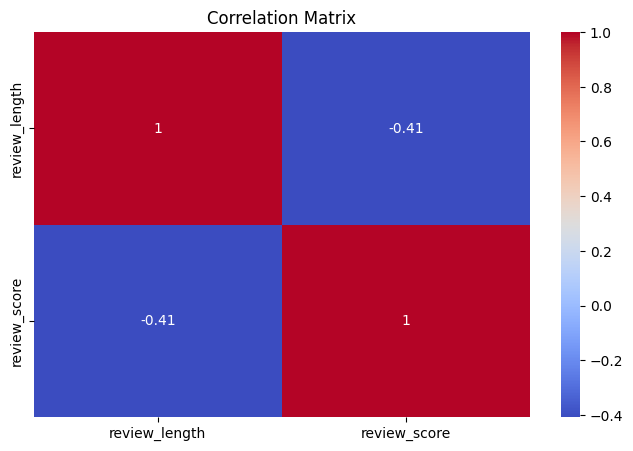

In [98]:
# 리뷰 길이 추가
df['review_length'] = df['review_comment_message'].str.len().fillna(0)

# 리뷰 길이와 리뷰 스코어 간의 상관관계 분석
correlation = df[['review_length', 'review_score']].corr()
print("Correlation between review length and review score:")
print(correlation)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 2. 라벨 값 분포와 리뷰 점수 비교

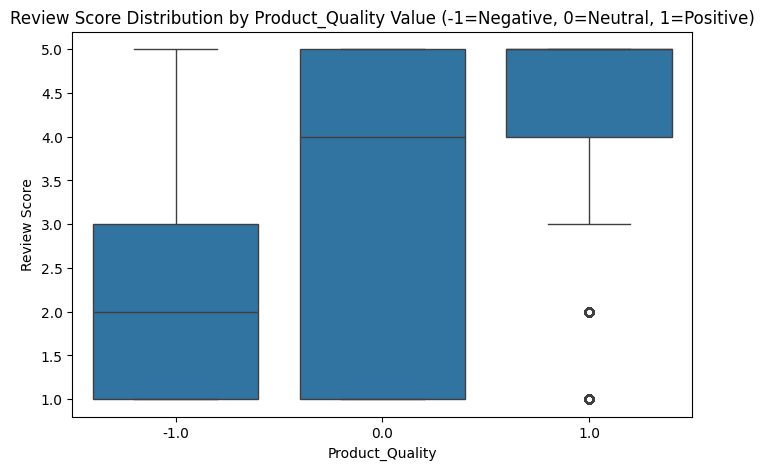

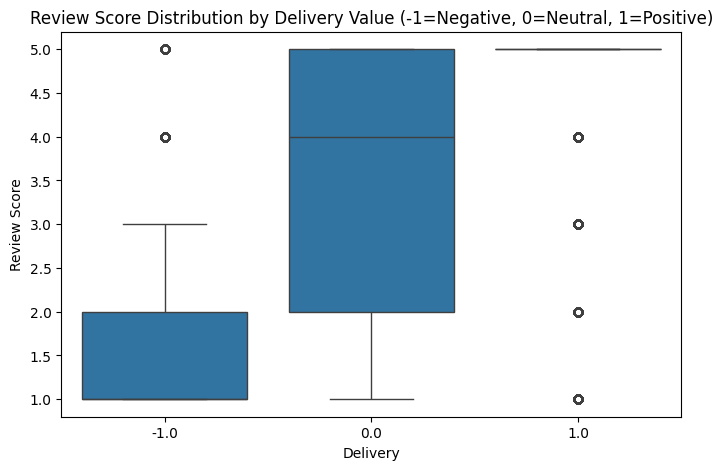

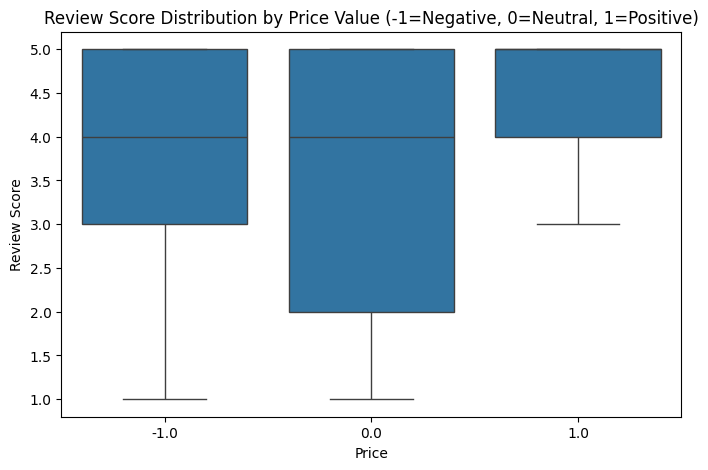

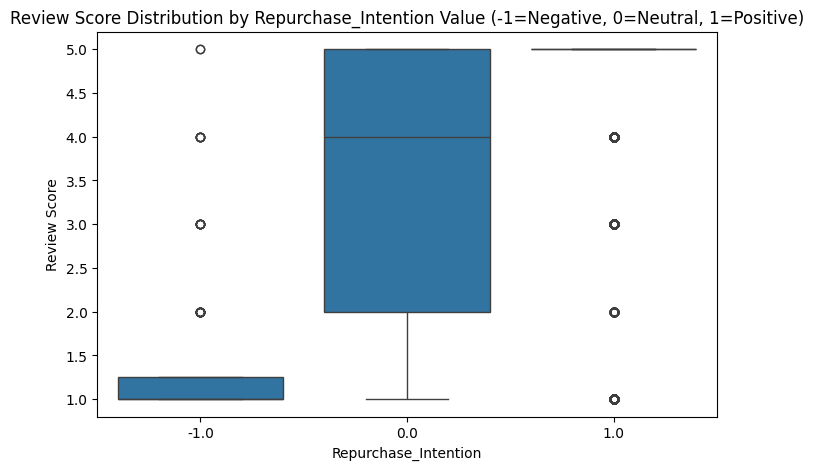

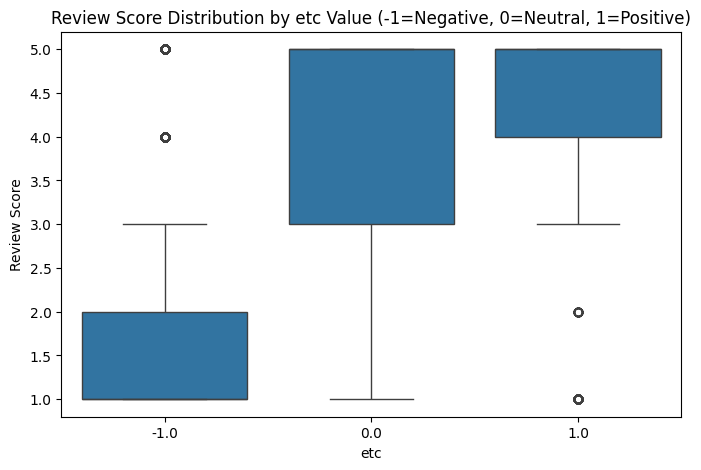

In [79]:
for label in ['Product_Quality', 'Delivery', 'Price', 'Repurchase_Intention', 'etc']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=label, y="review_score", data=df)
    plt.title(f'Review Score Distribution by {label} Value (-1=Negative, 0=Neutral, 1=Positive)')
    plt.xlabel(label)
    plt.ylabel("Review Score")
    plt.show()

# 3. 리뷰 길이와 라벨 값의 상관관계 분석

In [99]:

# 리뷰 길이와 각 라벨 간 상관관계 분석
for label in ['Product_Quality', 'Delivery', 'Price', 'Repurchase_Intention', 'etc']:
    correlation = df[['review_length', label]].corr().iloc[0, 1]
    print(f"Correlation between review length and {label}: {correlation:.4f}")


Correlation between review length and Product_Quality: -0.2043
Correlation between review length and Delivery: -0.0712
Correlation between review length and Price: -0.0051
Correlation between review length and Repurchase_Intention: -0.0205
Correlation between review length and etc: -0.4786


# 4. 별점과 배송 기간의 관계 분석

In [81]:
# 배송 기간 계산
df['delivery_duration'] = (pd.to_datetime(df['order_delivered_customer_date']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days

# 별점별 배송 기간 평균 계산
delivery_duration_by_score = df.groupby('review_score')['delivery_duration'].mean()
print("Average delivery duration by review score:")
print(delivery_duration_by_score)

Average delivery duration by review score:
review_score
1.0    19.134887
2.0    15.297579
3.0    13.564702
4.0    11.780161
5.0    10.198502
Name: delivery_duration, dtype: float64


# 5. 리뷰 작성 빈도와 고객 세그먼트 분석

In [82]:
# 고객별 리뷰 작성 횟수 계산
customer_review_counts = df.groupby('customer_unique_id').size()

# 특정 임계치 이상 리뷰 작성 고객 분석 (예: 리뷰 작성 횟수 상위 15% 고객)
threshold = customer_review_counts.quantile(0.85)
frequent_reviewers = customer_review_counts[customer_review_counts >= threshold]
print("Top 15% frequent reviewers:")
print(frequent_reviewers)

Top 15% frequent reviewers:
customer_unique_id
00053a61a98854899e70ed204dd4bafe    2
000bfa1d2f1a41876493be685390d6d3    2
000de6019bb59f34c099a907c151d855    2
000e309254ab1fc5ba99dd469d36bdb4    2
000fbf0473c10fc1ab6f8d2d286ce20c    4
                                   ..
ffeddf8aa7cdecf403e77b2e9a99e2ea    2
fff22793223fe80c97a8fd02ac5c6295    3
fff5eb4918b2bf4b2da476788d42051c    6
fff7219c86179ca6441b8f37823ba3d3    2
fffcf5a5ff07b0908bd4e2dbc735a684    2
Length: 14174, dtype: int64


# 6. 1번 이용한 고객들의 별점 평균과 2번 이상 이용한 고객들의 별점 평균

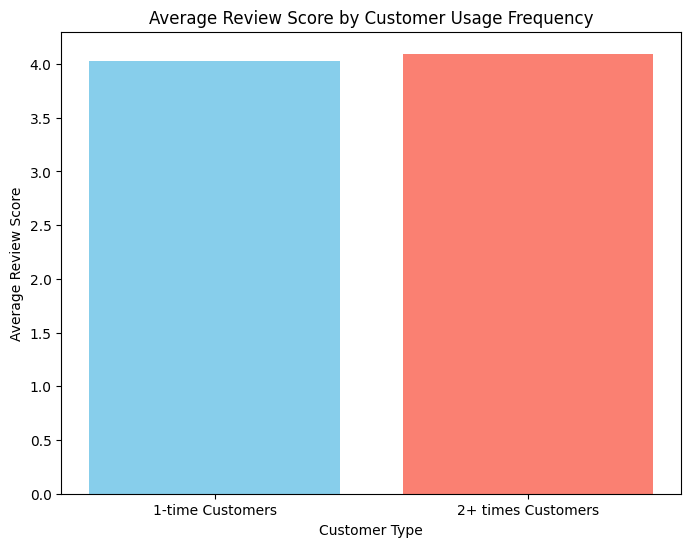

In [83]:
# 고객별 주문 횟수 계산
customer_order_counts = df.groupby('customer_unique_id')['order_id'].nunique()

# 1번 이용한 고객과 2번 이상 이용한 고객 분리
one_time_customers = customer_order_counts[customer_order_counts == 1].index
multi_time_customers = customer_order_counts[customer_order_counts > 1].index

# 각 그룹의 별점 평균 계산
one_time_avg_score = df[df['customer_unique_id'].isin(one_time_customers)]['review_score'].mean()
multi_time_avg_score = df[df['customer_unique_id'].isin(multi_time_customers)]['review_score'].mean()

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(['1-time Customers', '2+ times Customers'], [one_time_avg_score, multi_time_avg_score], color=['skyblue', 'salmon'])
plt.xlabel('Customer Type')
plt.ylabel('Average Review Score')
plt.title('Average Review Score by Customer Usage Frequency')
plt.show()

# 7. 1번 이용한 고객 수와 다수 이용한 고객 수

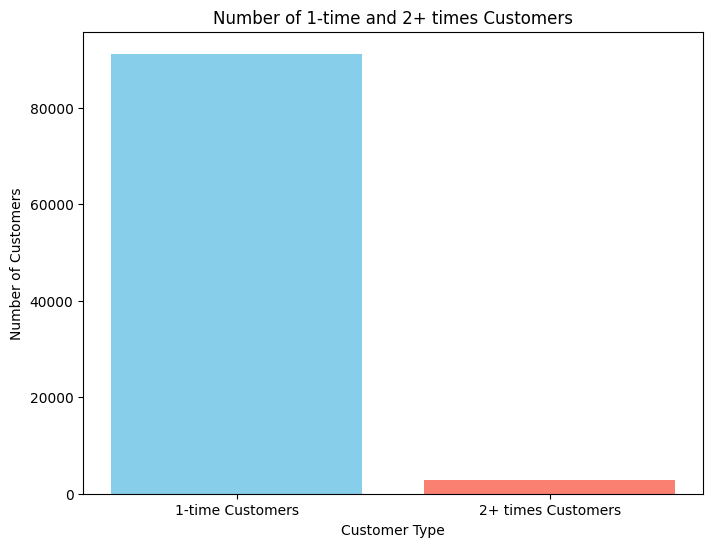

In [84]:
# 1번 이용한 고객 수와 다수 이용한 고객 수
one_time_customer_count = len(one_time_customers)
multi_time_customer_count = len(multi_time_customers)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(['1-time Customers', '2+ times Customers'], [one_time_customer_count, multi_time_customer_count], color=['skyblue', 'salmon'])
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.title('Number of 1-time and 2+ times Customers')
plt.show()


# 8. 리뷰를 작성한 고객 중 1번 이용한 고객과 다수 이용한 고객의 수 비교

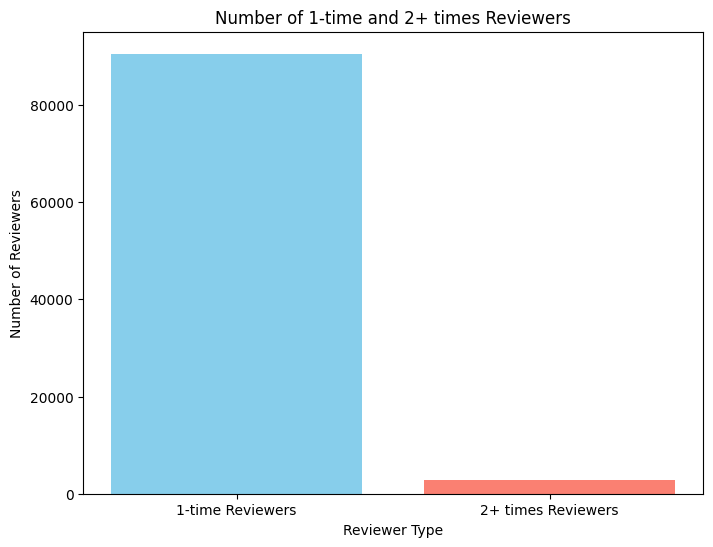

In [85]:
# 리뷰를 작성한 고객 중 1번 이용한 고객과 다수 이용한 고객 분리
reviewed_customers = df[df['review_score'].notnull()]['customer_unique_id']
one_time_reviewers = set(reviewed_customers).intersection(one_time_customers)
multi_time_reviewers = set(reviewed_customers).intersection(multi_time_customers)

# 리뷰 작성 고객 수 계산
one_time_reviewer_count = len(one_time_reviewers)
multi_time_reviewer_count = len(multi_time_reviewers)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(['1-time Reviewers', '2+ times Reviewers'], [one_time_reviewer_count, multi_time_reviewer_count], color=['skyblue', 'salmon'])
plt.xlabel('Reviewer Type')
plt.ylabel('Number of Reviewers')
plt.title('Number of 1-time and 2+ times Reviewers')
plt.show()


# 9. 리뷰 작성 고객 중 1번 이용한 고객과 다수 이용한 고객의 별점 평균 비교

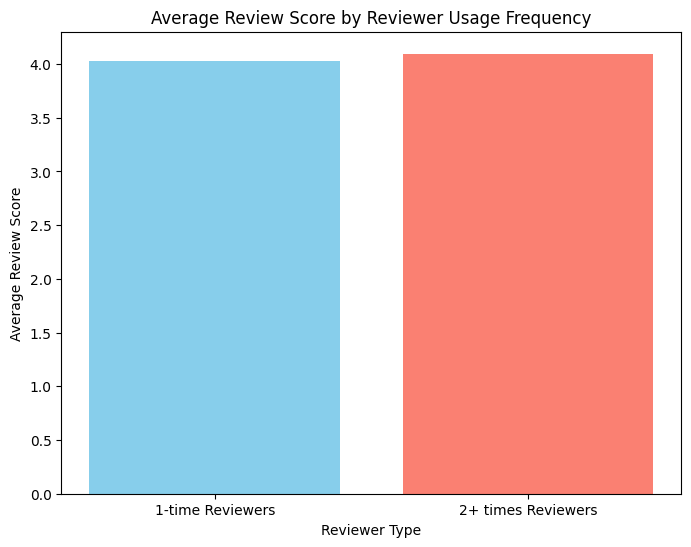

In [86]:
# 리뷰 작성한 고객 중 1번 이용한 고객과 다수 이용한 고객의 별점 평균 계산
one_time_reviewer_avg_score = df[df['customer_unique_id'].isin(one_time_reviewers)]['review_score'].mean()
multi_time_reviewer_avg_score = df[df['customer_unique_id'].isin(multi_time_reviewers)]['review_score'].mean()

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(['1-time Reviewers', '2+ times Reviewers'], [one_time_reviewer_avg_score, multi_time_reviewer_avg_score], color=['skyblue', 'salmon'])
plt.xlabel('Reviewer Type')
plt.ylabel('Average Review Score')
plt.title('Average Review Score by Reviewer Usage Frequency')
plt.show()


# 10. 각 레이블의 긍정적 리뷰 빈도와 리뷰 작성

In [100]:
# 긍정적(1) 리뷰의 길이와 리뷰 점수 평균 분석
for label in ['Product_Quality', 'Delivery', 'Price', 'Repurchase_Intention', 'etc']:
    positive_reviews = df[df[label] == 1]
    avg_length = positive_reviews['review_length'].mean()
    avg_score = positive_reviews['review_score'].mean()
    print(f"\nFor {label} (Positive=1):")
    print(f"Average Review Length: {avg_length:.2f}")
    print(f"Average Review Score: {avg_score:.2f}")



For Product_Quality (Positive=1):
Average Review Length: 64.48
Average Review Score: 4.63

For Delivery (Positive=1):
Average Review Length: 67.71
Average Review Score: 4.66

For Price (Positive=1):
Average Review Length: 58.52
Average Review Score: 4.61

For Repurchase_Intention (Positive=1):
Average Review Length: 68.07
Average Review Score: 4.56

For etc (Positive=1):
Average Review Length: 19.07
Average Review Score: 4.61


In [102]:
# 부정적(-1) 리뷰의 길이와 리뷰 점수 평균 분석
for label in ['Product_Quality', 'Delivery', 'Price', 'Repurchase_Intention', 'etc']:
    positive_reviews = df[df[label] == -1]
    avg_length = positive_reviews['review_length'].mean()
    avg_score = positive_reviews['review_score'].mean()
    print(f"\nFor {label} (Negative=-1):")
    print(f"Average Review Length: {avg_length:.2f}")
    print(f"Average Review Score: {avg_score:.2f}")



For Product_Quality (Negative=-1):
Average Review Length: 110.86
Average Review Score: 2.27

For Delivery (Negative=-1):
Average Review Length: 87.51
Average Review Score: 1.61

For Price (Negative=-1):
Average Review Length: 72.11
Average Review Score: 3.53

For Repurchase_Intention (Negative=-1):
Average Review Length: 133.56
Average Review Score: 1.44

For etc (Negative=-1):
Average Review Length: 113.34
Average Review Score: 1.72


# 코호트 분석

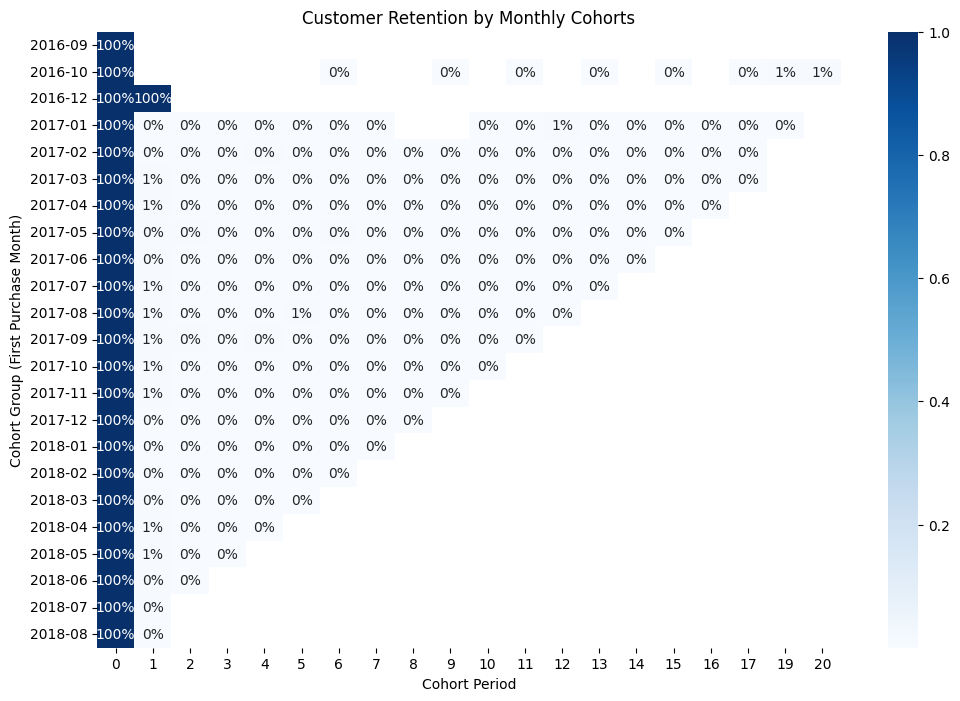

In [88]:
# 1. 코호트 기준 날짜 설정 (구매 월을 기준으로 코호트 구성)
df['purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.to_period('M')

# 2. 코호트 테이블 생성
# 첫 구매 월을 기준으로 코호트 그룹 생성
df['cohort'] = df.groupby('customer_unique_id')['purchase_month'].transform('min')

# 코호트 기간 계산 (첫 구매 월과 리뷰 작성 월의 차이)
df['cohort_period'] = (df['purchase_month'] - df['cohort']).apply(lambda x: x.n)

# 3. 코호트 분석을 위한 피벗 테이블 생성
# 각 코호트 그룹이 매월 남긴 리뷰 수를 계산하여 피벗 테이블 생성
cohort_counts = df.pivot_table(index='cohort', columns='cohort_period', values='customer_unique_id', aggfunc='nunique')

# 4. 코호트 유지율 계산
# 각 코호트의 첫 달 대비 유지율을 계산
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# 5. 코호트 유지율 시각화

plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Customer Retention by Monthly Cohorts")
plt.xlabel("Cohort Period")
plt.ylabel("Cohort Group (First Purchase Month)")
plt.show()
